## Importing necessary libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# For logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

## Helper function for visualisation

In [2]:
def plot_confusion_heatmap(report, y_true, y_pred, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)  # Set zero_division to 1
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Append metrics below the heatmap for display
    plt.text(1, 2.3, f'Accuracy: {accuracy:.2f}', fontsize = 10)
    plt.text(1, 2.4, f'Precision: {precision:.2f}', fontsize = 10)
    plt.text(1, 2.5, f'Recall: {recall:.2f}', fontsize = 10)
    plt.text(1, 2.6, f'F1 Score: {f1:.2f}', fontsize = 10)

    # Update report with metrics
    # Create a new DataFrame with the values to append
    new_row = pd.DataFrame({'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1_Score': [f1]})

    # Concatenate the new DataFrame with the existing one
    report = pd.concat([report, new_row], ignore_index=True)
    
    plt.show()
    return report

In [3]:
# Creating df to store the values of the classification reports
train_report = pd.DataFrame()
test_report = pd.DataFrame()

## Importing data

In [5]:
traindf = pd.read_csv("train.csv", index_col = 0)
traindf

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
132,0,0,0,0,1,1,1,1,0
22,0,1,1,1,1,1,0,1,0
365,1,0,1,0,1,1,1,1,1
55,1,0,0,0,1,1,0,1,0
117,1,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
218,1,1,0,0,1,1,1,1,0
223,1,1,1,0,1,1,1,1,0
271,1,1,1,0,1,1,1,1,0
474,0,1,0,1,0,1,1,1,0


In [6]:
testdf = pd.read_csv("test.csv", index_col = 0)
testdf

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
283,1,1,0,0,0,1,1,1,0
219,1,1,1,0,0,1,1,1,0
270,1,1,1,0,1,1,0,1,1
178,0,1,0,0,1,1,0,1,0
334,1,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
580,1,1,0,0,1,1,1,1,0
72,1,1,0,0,1,1,1,1,0
217,1,1,0,0,1,1,1,1,0
531,1,1,0,0,0,1,0,1,0


In [7]:
oversampled_traindf = pd.read_csv("oversampled_student_data.csv")
oversampled_traindf

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
0,0,0,0,0,1,1,1,1,0
1,0,1,1,1,1,1,0,1,0
2,1,0,1,0,1,1,1,1,1
3,1,0,0,0,1,1,0,1,0
4,1,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
617,1,1,1,0,1,1,1,1,1
618,1,1,1,0,1,1,1,1,1
619,1,1,0,0,1,1,1,1,1
620,0,0,1,0,1,1,1,1,1


In [8]:
undersampled_traindf = pd.read_csv("undersampled_student_data.csv")
undersampled_traindf

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
0,1,1,0,0,0,1,1,1,0
1,1,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,1,0,0
3,1,1,0,0,1,0,1,1,0
4,1,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
151,1,1,0,0,1,1,0,1,1
152,0,1,0,0,0,1,1,1,1
153,0,1,0,0,0,1,0,1,1
154,1,1,0,0,1,1,1,1,1


## 1. Classification of traindf by Logistic Regression

In [9]:
# Assigning y_train and x_train for the training data
y_train = traindf['PerformedWell']  
x_train = traindf.drop('PerformedWell', axis=1)  # Dropping the response variable column to keep everything else

# Assigning y_test and x_test for the test data
y_test = testdf['PerformedWell']  
x_test = testdf.drop('PerformedWell', axis=1)  # Dropping the response variable column to keep everything else

In [10]:
# Correlation of data 
traindf.corr()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
BigFamily,1.000000,0.215544,-0.044364,-0.047447,0.094807,0.003134,0.039291,0.056670,-0.059882
ParentsLivingTogether,0.215544,1.000000,-0.092489,-0.001833,-0.016041,0.046724,0.074820,0.127872,-0.046371
AtLeast1EducatedParent,-0.044364,-0.092489,1.000000,0.194508,0.263230,0.053953,0.195098,-0.007486,0.172341
ParentEducationGap,-0.047447,-0.001833,0.194508,1.000000,0.072087,0.013761,0.022739,-0.018609,0.065893
M_employed,0.094807,-0.016041,0.263230,0.072087,1.000000,0.134696,0.014096,0.001766,0.101978
F_employed,0.003134,0.046724,0.053953,0.013761,0.134696,1.000000,-0.065158,0.016710,0.040105
SupportedByFamily,0.039291,0.074820,0.195098,0.022739,0.014096,-0.065158,1.000000,0.024550,-0.023073
GoodFamilyRelation,0.056670,0.127872,-0.007486,-0.018609,0.001766,0.016710,0.024550,1.000000,0.067718
PerformedWell,-0.059882,-0.046371,0.172341,0.065893,0.101978,0.040105,-0.023073,0.067718,1.000000


In [11]:
# Perform logistic regression
LG = LogisticRegression()

# Fit the data
LG.fit(x_train, y_train)

# Print out the mean accuracy of the logistic regression model
print("Mean accuracy of the Logistic Regression Model: ", LG.score(x_test, y_test))

Mean accuracy of the Logistic Regression Model:  0.7961538461538461


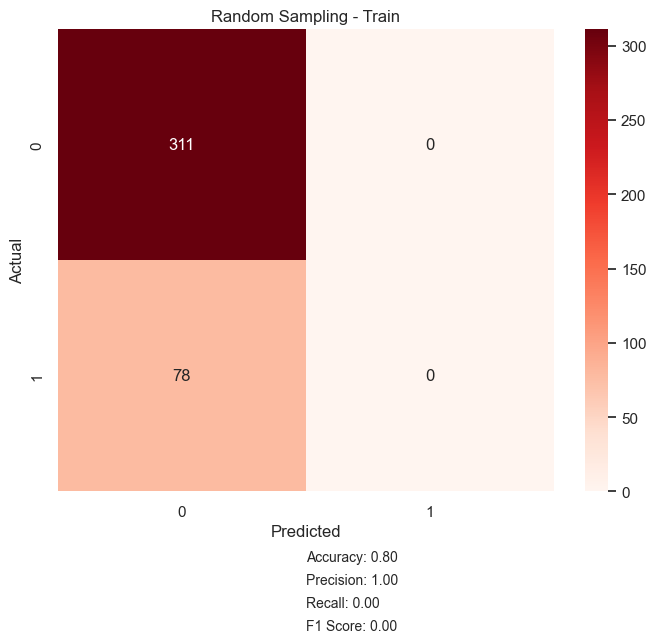

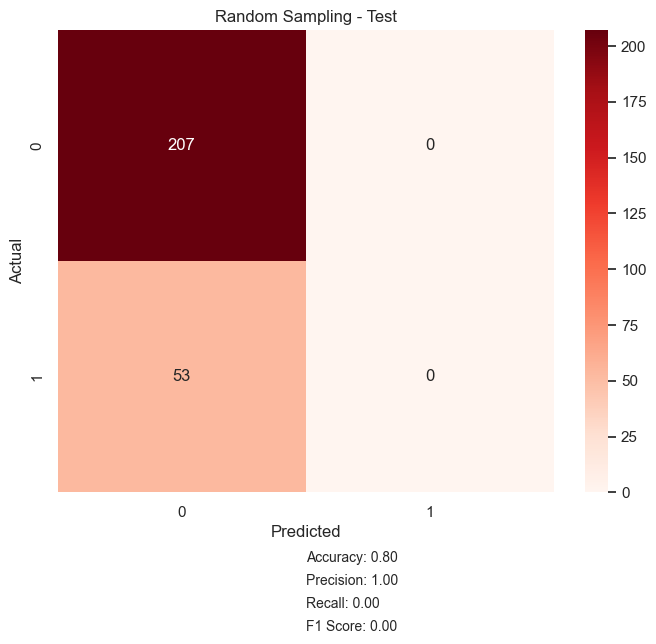

In [12]:
# Predicting the data
y_train_prediction = LG.predict(x_train)
y_test_prediction = LG.predict(x_test)

# Visualisation
train_report = plot_confusion_heatmap(train_report, y_train, y_train_prediction, title = "Random Sampling - Train")
test_report = plot_confusion_heatmap(test_report, y_test, y_test_prediction, title = "Random Sampling - Test")

## 2. Classification of oversampled traindf by Logistic Regression

In [14]:
# Assigning y_train and x_train for the oversampled training data
y_train = oversampled_traindf['PerformedWell']  
x_train = oversampled_traindf.drop('PerformedWell', axis=1)  # Dropping the response variable column to keep everything else

In [15]:
# Correlation of data
oversampled_traindf.corr()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
BigFamily,1.000000,0.221048,0.018837,-1.563354e-02,0.181675,0.027208,0.131650,0.052740,-1.010886e-01
ParentsLivingTogether,0.221048,1.000000,-0.087080,4.563664e-02,-0.023422,-0.002833,0.069220,0.122845,-3.841894e-02
AtLeast1EducatedParent,0.018837,-0.087080,1.000000,2.040022e-01,0.275298,0.023449,0.200003,0.018248,1.660140e-01
ParentEducationGap,-0.015634,0.045637,0.204002,1.000000e+00,0.075828,0.031141,0.099786,0.007662,-1.800287e-16
M_employed,0.181675,-0.023422,0.275298,7.582753e-02,1.000000,0.197281,0.041377,0.051736,1.207246e-01
F_employed,0.027208,-0.002833,0.023449,3.114131e-02,0.197281,1.000000,-0.075408,0.071547,5.243225e-02
SupportedByFamily,0.131650,0.069220,0.200003,9.978603e-02,0.041377,-0.075408,1.000000,0.007008,-1.337082e-02
GoodFamilyRelation,0.052740,0.122845,0.018248,7.662048e-03,0.051736,0.071547,0.007008,1.000000,8.434347e-02
PerformedWell,-0.101089,-0.038419,0.166014,-1.800287e-16,0.120725,0.052432,-0.013371,0.084343,1.000000e+00


In [16]:
# Perform logistic regression
LG_over = LogisticRegression()

# Fit the data
LG_over.fit(x_train, y_train)

# Print out the mean accuracy of the logistic regression model
print("Mean accuracy of the Logistic Regression Model: ", LG_over.score(x_test, y_test))

Mean accuracy of the Logistic Regression Model:  0.5846153846153846


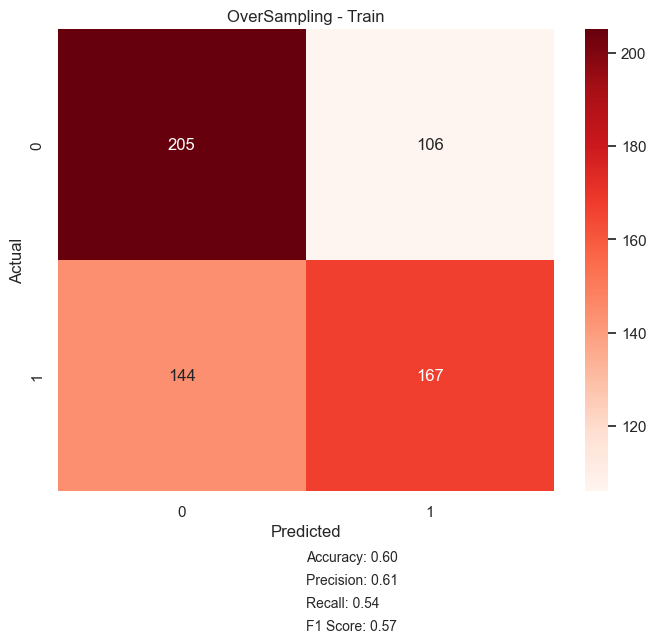

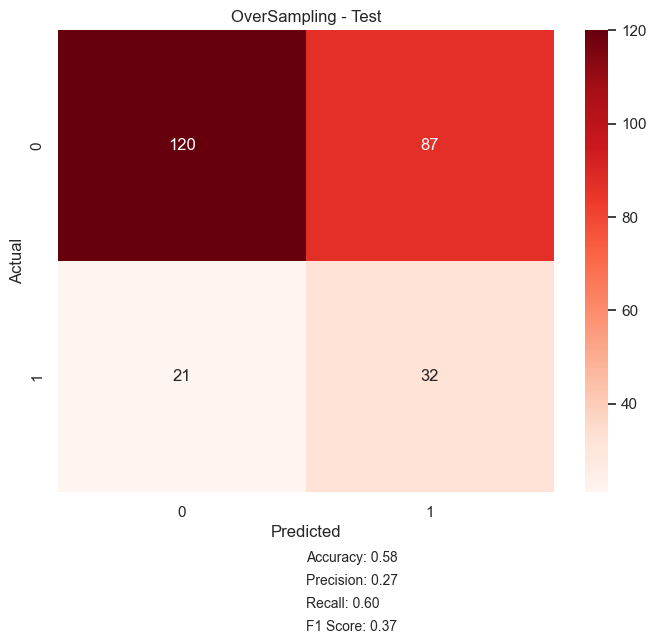

In [17]:
# Predicting the data
y_train_prediction = LG_over.predict(x_train)
y_test_prediction = LG_over.predict(x_test)

# Visualisation
train_report = plot_confusion_heatmap(train_report, y_train, y_train_prediction, title = "OverSampling - Train")
test_report = plot_confusion_heatmap(test_report, y_test, y_test_prediction, title = "OverSampling - Test")

## 3. Classification of undersampled traindf using Logistic Regression

In [18]:
# Assigning y_train and x_train for the oversampled training data
y_train = undersampled_traindf['PerformedWell']  
x_train = undersampled_traindf.drop('PerformedWell', axis=1)  # Dropping the response variable column to keep everything else

In [19]:
# Correlation of data
undersampled_traindf.corr()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
BigFamily,1.000000,0.201961,0.045769,0.032096,0.089093,-0.048980,0.107657,0.011960,-0.124295
ParentsLivingTogether,0.201961,1.000000,-0.042332,0.126802,-0.029487,-0.021267,0.086489,0.159502,-0.036835
AtLeast1EducatedParent,0.045769,-0.042332,1.000000,0.110215,0.289451,0.013226,0.244556,0.015430,0.213809
ParentEducationGap,0.032096,0.126802,0.110215,1.000000,0.055129,0.033148,0.102924,-0.005044,0.017474
M_employed,0.089093,-0.029487,0.289451,0.055129,1.000000,0.208429,0.012004,0.086090,0.172657
F_employed,-0.048980,-0.021267,0.013226,0.033148,0.208429,1.000000,-0.125048,0.031746,0.027493
SupportedByFamily,0.107657,0.086489,0.244556,0.102924,0.012004,-0.125048,1.000000,0.038732,-0.067085
GoodFamilyRelation,0.011960,0.159502,0.015430,-0.005044,0.086090,0.031746,0.038732,1.000000,0.096225
PerformedWell,-0.124295,-0.036835,0.213809,0.017474,0.172657,0.027493,-0.067085,0.096225,1.000000


In [20]:
# Perform logistic regression
LG_under = LogisticRegression()

# Fit the data
LG_under.fit(x_train, y_train)

# Print out the mean accuracy of the logistic regression model
print("Mean accuracy of the Logistic Regression Model: ", LG_under.score(x_test, y_test))

Mean accuracy of the Logistic Regression Model:  0.5769230769230769


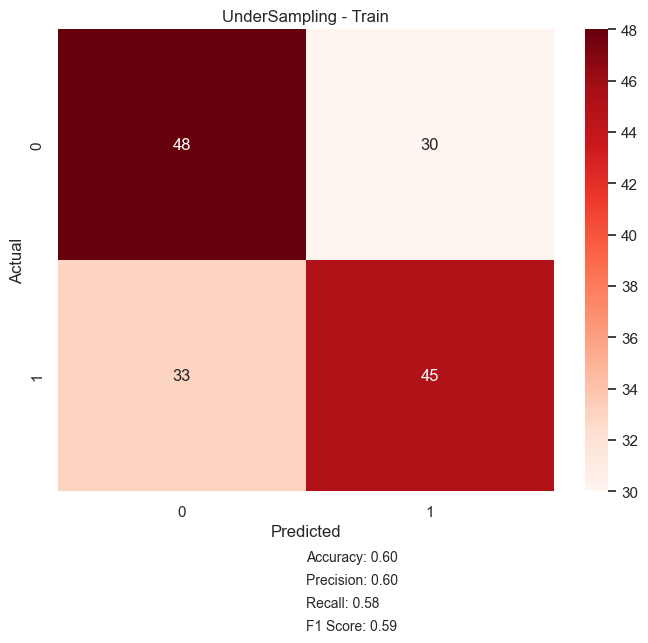

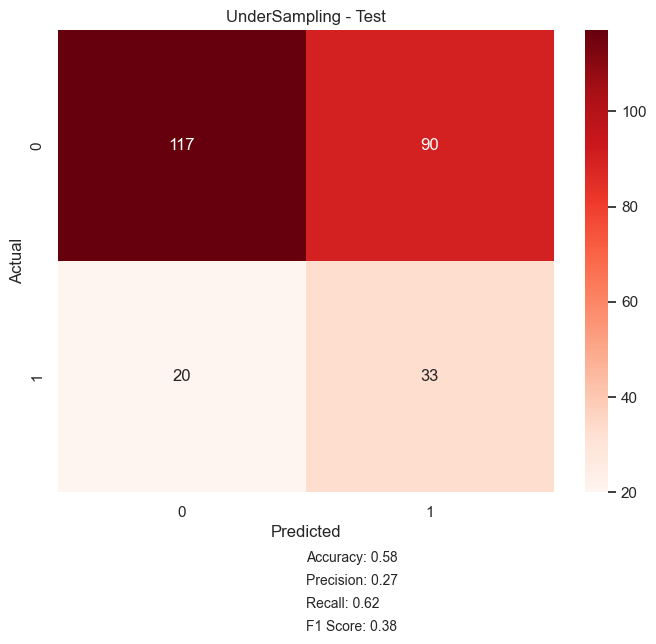

In [21]:
# Predicting the data
y_train_prediction = LG_under.predict(x_train)
y_test_prediction = LG_under.predict(x_test)

# Visualisation
train_report = plot_confusion_heatmap(train_report, y_train, y_train_prediction, title = "UnderSampling - Train")
test_report = plot_confusion_heatmap(test_report, y_test, y_test_prediction, title = "UnderSampling - Test")

## Visualised comparison for each metric in classification report

In [22]:
def plot_bar_graph(table, row, title):
    plt.figure(figsize=(8,6))
    plt.title(title)
    
    # Set the limits for the y-axis
    plt.ylim([0,1])

    # Create the barplot
    splot = sb.barplot(x=['Original', 'Oversampled', 'Undersampled'], y = table.iloc[row,:])

    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    for bar in splot.patches:
        if bar.get_height() == 0:
            splot.annotate(format(bar.get_height(), '.2f'), 
                           (bar.get_x() + bar.get_width() / 2.,
                            bar.get_height()), 
                           ha = 'center', va = 'center', 
                           size = 15, xytext = (0, 14), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(bar.get_height(), '.2f'), 
                           (bar.get_x() + bar.get_width() / 2., 
                            bar.get_height()), 
                           ha = 'center', va = 'center', 
                           size = 15, xytext = (0, -14), 
                           textcoords = 'offset points')

    # Show the plot
    plt.show()

## Visualising comparisons between training data

In [23]:
# Assuming train_report DataFrame is already created
train_report = train_report.set_axis(['Original', 'Oversampled', 'Undersampled'], axis = 0)
train_report = train_report.set_axis(['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis = 1)

# Switching axes
train_report_flip = train_report.transpose()

train_report_flip

,Original,Oversampled,Undersampled
Accuracy,0.799486,0.598071,0.596154
Precision,1.000000,0.611722,0.600000
Recall,0.000000,0.536977,0.576923
F1 Score,0.000000,0.571918,0.588235


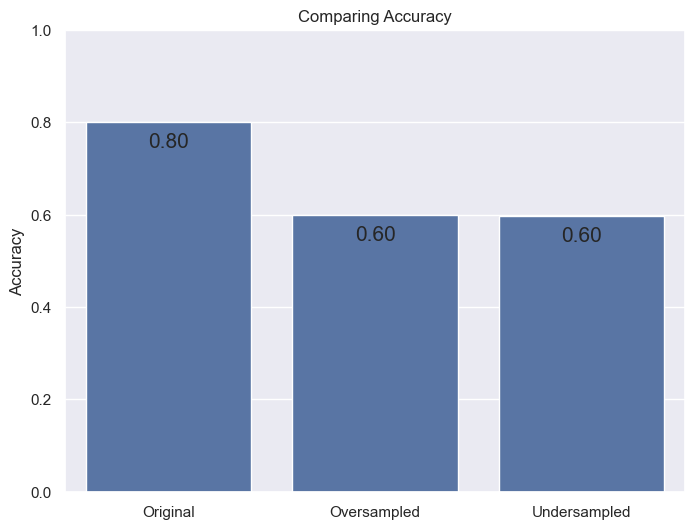

In [24]:
plot_bar_graph(train_report_flip, 0, "Comparing Accuracy")

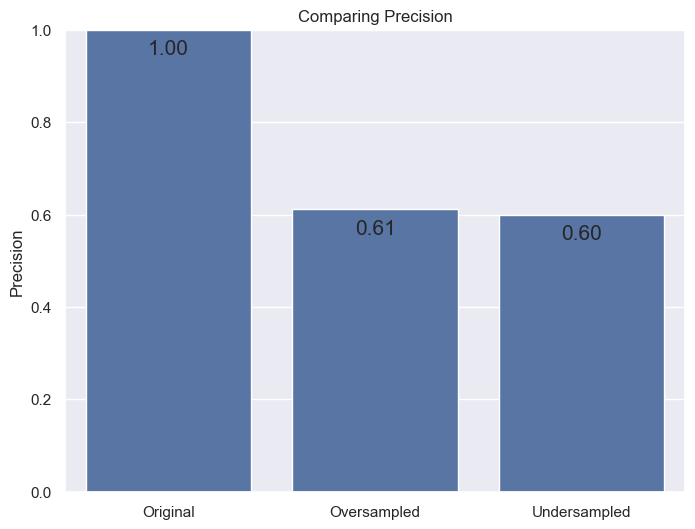

In [25]:
plot_bar_graph(train_report_flip, 1, "Comparing Precision")

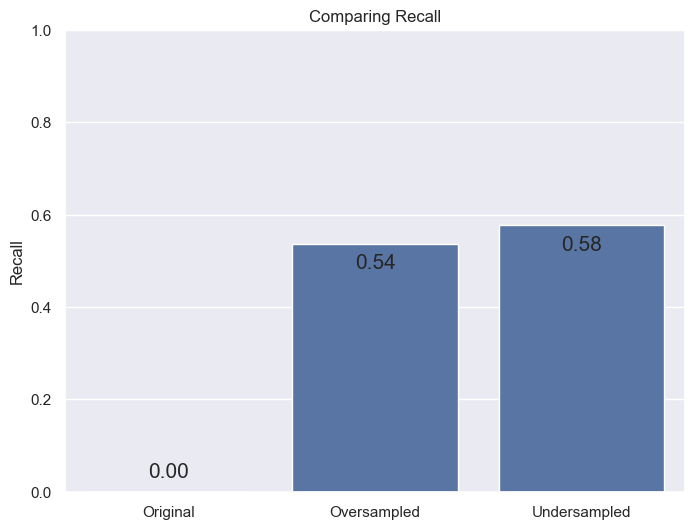

In [26]:
plot_bar_graph(train_report_flip, 2, "Comparing Recall")

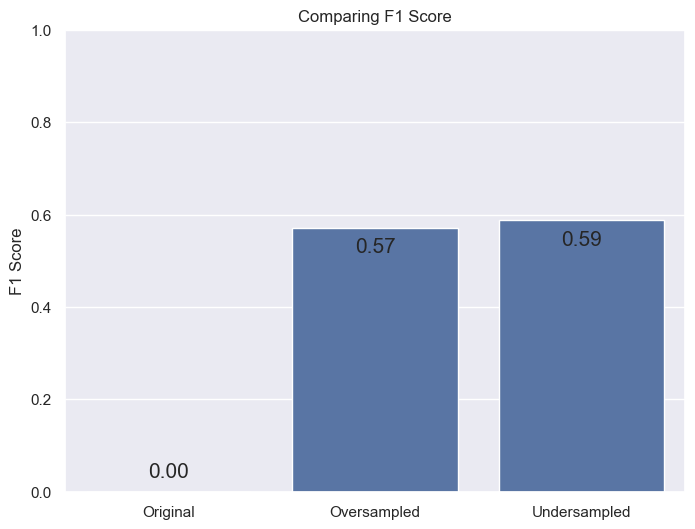

In [27]:
plot_bar_graph(train_report_flip, 3, "Comparing F1 Score")

## Visualing comparisons between test data

In [28]:
# Assuming train_report DataFrame is already created
test_report = test_report.set_axis(['Original', 'Oversampled', 'Undersampled'], axis = 0)
test_report = test_report.set_axis(['Accuracy', 'Precision', 'Recall', 'F1 Score'], axis = 1)

# Switching axes
test_report_flip = test_report.transpose()

test_report_flip

,Original,Oversampled,Undersampled
Accuracy,0.796154,0.584615,0.576923
Precision,1.000000,0.268908,0.268293
Recall,0.000000,0.603774,0.622642
F1 Score,0.000000,0.372093,0.375000


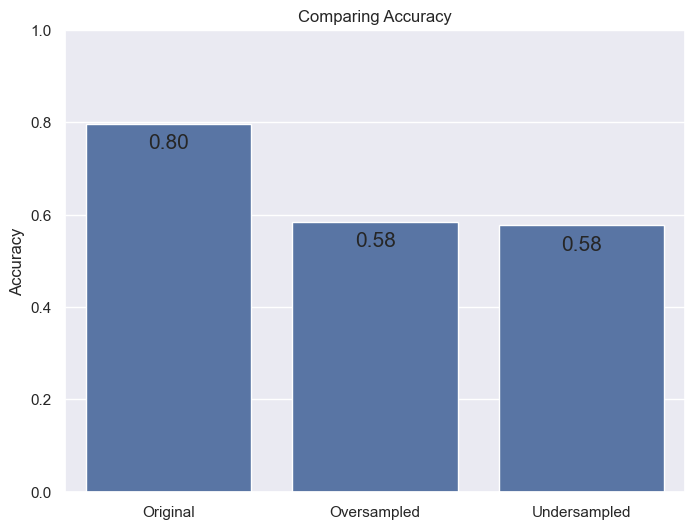

In [29]:
plot_bar_graph(test_report_flip, 0, "Comparing Accuracy")

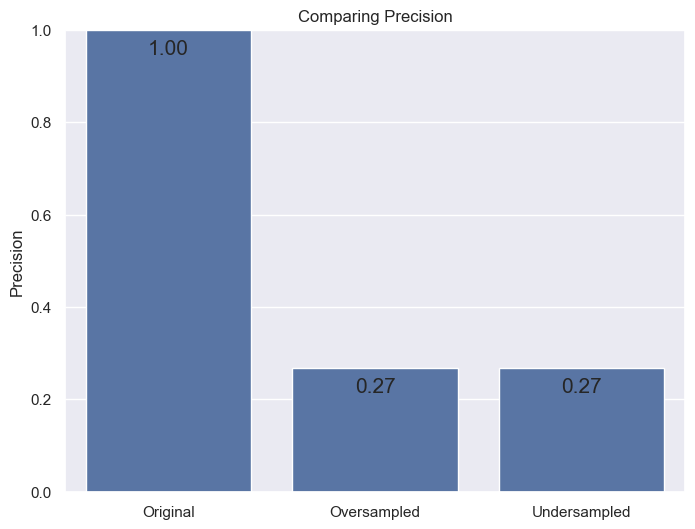

In [30]:
plot_bar_graph(test_report_flip, 1, "Comparing Precision")

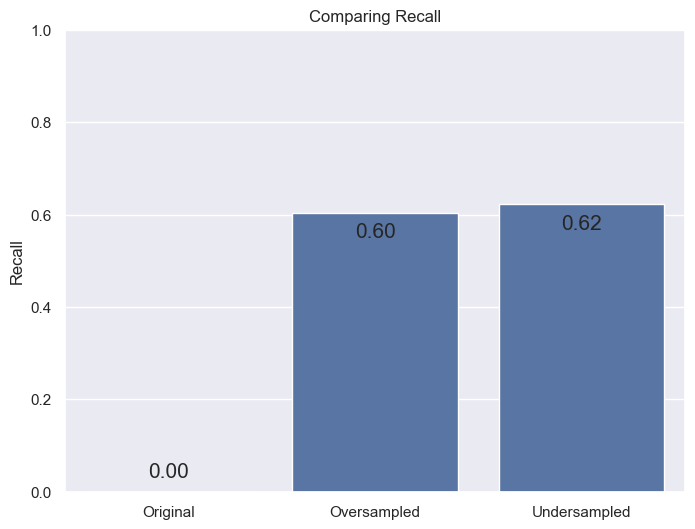

In [31]:
plot_bar_graph(test_report_flip, 2, "Comparing Recall")

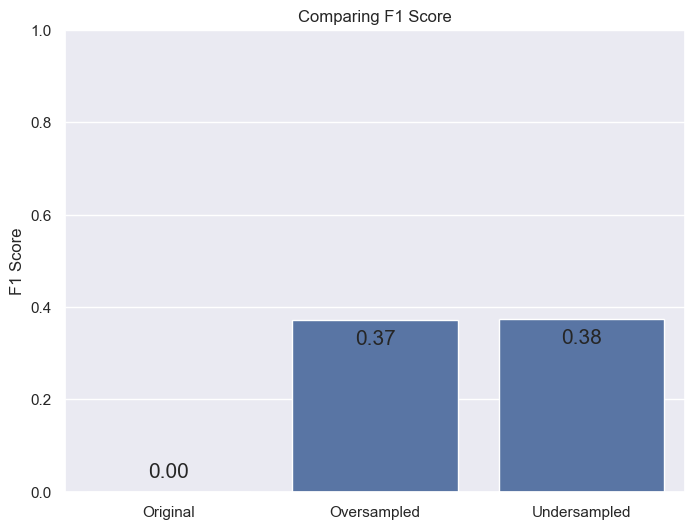

In [32]:
plot_bar_graph(test_report_flip, 3, "Comparing F1 Score")